In [1]:
#!/usr/bin/env python3
#CS 6140
import hashlib as h
import pyspark
import sys
import os
import time
import math as m
import matplotlib.pyplot as plt

os.environ['PYTHONHASHSEED'] = '123'
#print(os.environ['PYTHONHASHSEED'])

def Get_Doc(doc):
    file = open(doc, "r")
    for line in file:
        return str(line)

def Calculate_Distinct_Kgrams(kgram, document, doc, char):
    list = set()
    if char:
        for i in range(len(document) - kgram + 1):
            list.add(document[i:i+kgram])
    else:
        words = document.split(" ")
        for i in range(len(words) - kgram + 1):
            list.add(words[i] + " " + words[i+1])
    #print(list)
    print("\t" + doc + ":\t" + str(len(list)))
    return list

def Jaccard(first, second):
    return len(first & second) / len(first | second)
def Jaccard_Special(first, second):
    same = 0
    for i in range(len(first)):
        if first[i] == second[i]:
            same += 1
    return same / len(first)
def Part1():
    print("Part 1(A):")
    print("When k-gram is 2 characters: ")
    G1 = []
    G1.append(Calculate_Distinct_Kgrams(2, Get_Doc("D1.txt"), "D1", char=True))
    G1.append(Calculate_Distinct_Kgrams(2, Get_Doc("D2.txt"), "D2", char=True))
    G1.append(Calculate_Distinct_Kgrams(2, Get_Doc("D3.txt"), "D3", char=True))
    G1.append(Calculate_Distinct_Kgrams(2, Get_Doc("D4.txt"), "D4", char=True))

    print("When k-gram is 3 characters: ")
    G2 = []
    G2.append(Calculate_Distinct_Kgrams(3, Get_Doc("D1.txt"), "D1", char=True))
    G2.append(Calculate_Distinct_Kgrams(3, Get_Doc("D2.txt"), "D2", char=True))
    G2.append(Calculate_Distinct_Kgrams(3, Get_Doc("D3.txt"), "D3", char=True))
    G2.append(Calculate_Distinct_Kgrams(3, Get_Doc("D4.txt"), "D4", char=True))

    print("When k-gram is 2 words: ")
    G3 = []
    G3.append(Calculate_Distinct_Kgrams(2, Get_Doc("D1.txt"), "D1", char=False))
    G3.append(Calculate_Distinct_Kgrams(2, Get_Doc("D2.txt"), "D2", char=False))
    G3.append(Calculate_Distinct_Kgrams(2, Get_Doc("D3.txt"), "D3", char=False))
    G3.append(Calculate_Distinct_Kgrams(2, Get_Doc("D4.txt"), "D4", char=False))

    print("\nPart 1(B):")
    print("When k-gram is 2 characters (G1): ")
    print("\tD1, D2 Jaccard similarity is:\t" + str(Jaccard(G1[0], G1[1])))
    print("\tD1, D3 Jaccard similarity is:\t" + str(Jaccard(G1[0], G1[2])))
    print("\tD1, D4 Jaccard similarity is:\t" + str(Jaccard(G1[0], G1[3])))
    print("\tD2, D3 Jaccard similarity is:\t" + str(Jaccard(G1[1], G1[2])))
    print("\tD2, D4 Jaccard similarity is:\t" + str(Jaccard(G1[1], G1[3])))
    print("\tD3, D4 Jaccard similarity is:\t" + str(Jaccard(G1[2], G1[3])))

    print("When k-gram is 3 characters (G2): ")
    print("\tD1, D2 Jaccard similarity is:\t" + str(Jaccard(G2[0], G2[1])))
    print("\tD1, D3 Jaccard similarity is:\t" + str(Jaccard(G2[0], G2[2])))
    print("\tD1, D4 Jaccard similarity is:\t" + str(Jaccard(G2[0], G2[3])))
    print("\tD2, D3 Jaccard similarity is:\t" + str(Jaccard(G2[1], G2[2])))
    print("\tD2, D4 Jaccard similarity is:\t" + str(Jaccard(G2[1], G2[3])))
    print("\tD3, D4 Jaccard similarity is:\t" + str(Jaccard(G2[2], G2[3])))

    print("When k-gram is 2 words (G3): ")
    print("\tD1, D2 Jaccard similarity is:\t" + str(Jaccard(G3[0], G3[1])))
    print("\tD1, D3 Jaccard similarity is:\t" + str(Jaccard(G3[0], G3[2])))
    print("\tD1, D4 Jaccard similarity is:\t" + str(Jaccard(G3[0], G3[3])))
    print("\tD2, D3 Jaccard similarity is:\t" + str(Jaccard(G3[1], G3[2])))
    print("\tD2, D4 Jaccard similarity is:\t" + str(Jaccard(G3[1], G3[3])))
    print("\tD3, D4 Jaccard similarity is:\t" + str(Jaccard(G3[2], G3[3])))

    #print("D3, D4:\t" + str(Jaccard_Special(Get_Vector(G2[2], 100), Get_Vector(G2[3], 100))))

    return G2
def Get_Vector(doc, t):
    vector = []
    #print(doc)
    for i in range(t):
        smallest = sys.maxsize
        for j in doc:
            #option 1
            h = bytes(j+str(i), 'utf-8')
            hsh = hash(j+str(i))
#             print(hsh)
            #option 2
            """stri = j + str(i)
            st = bytes(stri, 'utf-8')
            hsh = int(h.md5(st).hexdigest(), 16)"""
            if hsh < smallest:
                smallest = hsh
        vector.append(smallest)
    return vector

In [2]:
def plot(x, y, xl, yl):
    plt.plot(x, y)
    plt.xlabel(xl, fontsize=10)
    plt.ylabel(yl, fontsize=10)
    plt.grid()
    plt.show()

In [3]:
def Part2(G2_D1, G2_D2):
    #print(Get_Vector(G2_D1, 20))
    #print(Get_Vector(G2_D2, 20))

    print("\nPart 2(A):")
    print("The Jaccard similarity for D1 and D2 using min-hash:")
    
    tArr = [20, 60, 150, 300, 350, 400, 450, 500, 550, 600, 650, 700, 800, 900, 1000]
    timeList = []
    js = []
    for item in tArr:
        a = time.clock()
        j = Jaccard_Special(Get_Vector(G2_D1, item), Get_Vector(G2_D2, item))
        b = time.clock()
        timeList.append(b-a)
        js.append(j)
        print("\tt"+ str(item) + " is:\t" + str(j) + "\n\tTime =\t" + str(b - a), end="\n\n")
        
    plot(tArr, js, "Number of Hash Functions", "Jaccard Similarity")
    plot(timeList, js, "Time Taken", "Jaccard Similarity")
    plot(tArr, timeList, "Number of Hash Functions", "Time Taken")

    return

Part 1(A):
When k-gram is 2 characters: 
	D1:	266
	D2:	265
	D3:	258
	D4:	259
When k-gram is 3 characters: 
	D1:	815
	D2:	804
	D3:	757
	D4:	771
When k-gram is 2 words: 
	D1:	309
	D2:	308
	D3:	295
	D4:	261

Part 1(B):
When k-gram is 2 characters (G1): 
	D1, D2 Jaccard similarity is:	0.9962406015037594
	D1, D3 Jaccard similarity is:	0.9124087591240876
	D1, D4 Jaccard similarity is:	0.7326732673267327
	D2, D3 Jaccard similarity is:	0.9157509157509157
	D2, D4 Jaccard similarity is:	0.7293729372937293
	D3, D4 Jaccard similarity is:	0.6950819672131148
When k-gram is 3 characters (G2): 
	D1, D2 Jaccard similarity is:	0.9648058252427184
	D1, D3 Jaccard similarity is:	0.7312775330396476
	D1, D4 Jaccard similarity is:	0.35555555555555557
	D2, D3 Jaccard similarity is:	0.7402452619843924
	D2, D4 Jaccard similarity is:	0.3496143958868895
	D3, D4 Jaccard similarity is:	0.3510167992926614
When k-gram is 2 words (G3): 
	D1, D2 Jaccard similarity is:	0.7679083094555874
	D1, D3 Jaccard similarity is:	0.

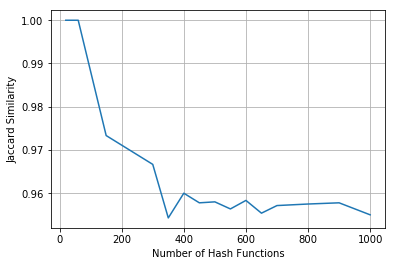

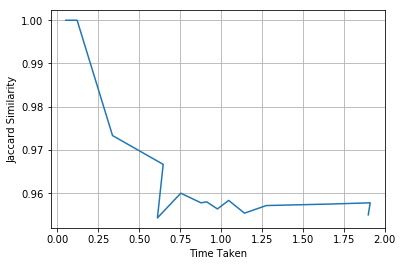

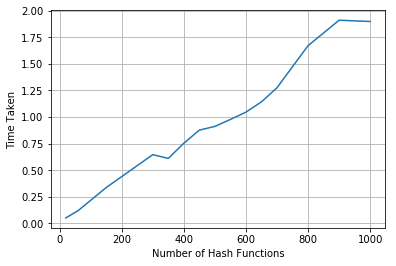

In [4]:
def main():
    G2 = Part1()
    G2_D1 = G2[0]
    G2_D2 = G2[1]
    Part2(G2_D1, G2_D2)
    return

if __name__ == "__main__":
    main()
    exit(0)